In [ ]:
!pip install missingno
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/bike_sharing_daily.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


In [ ]:
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

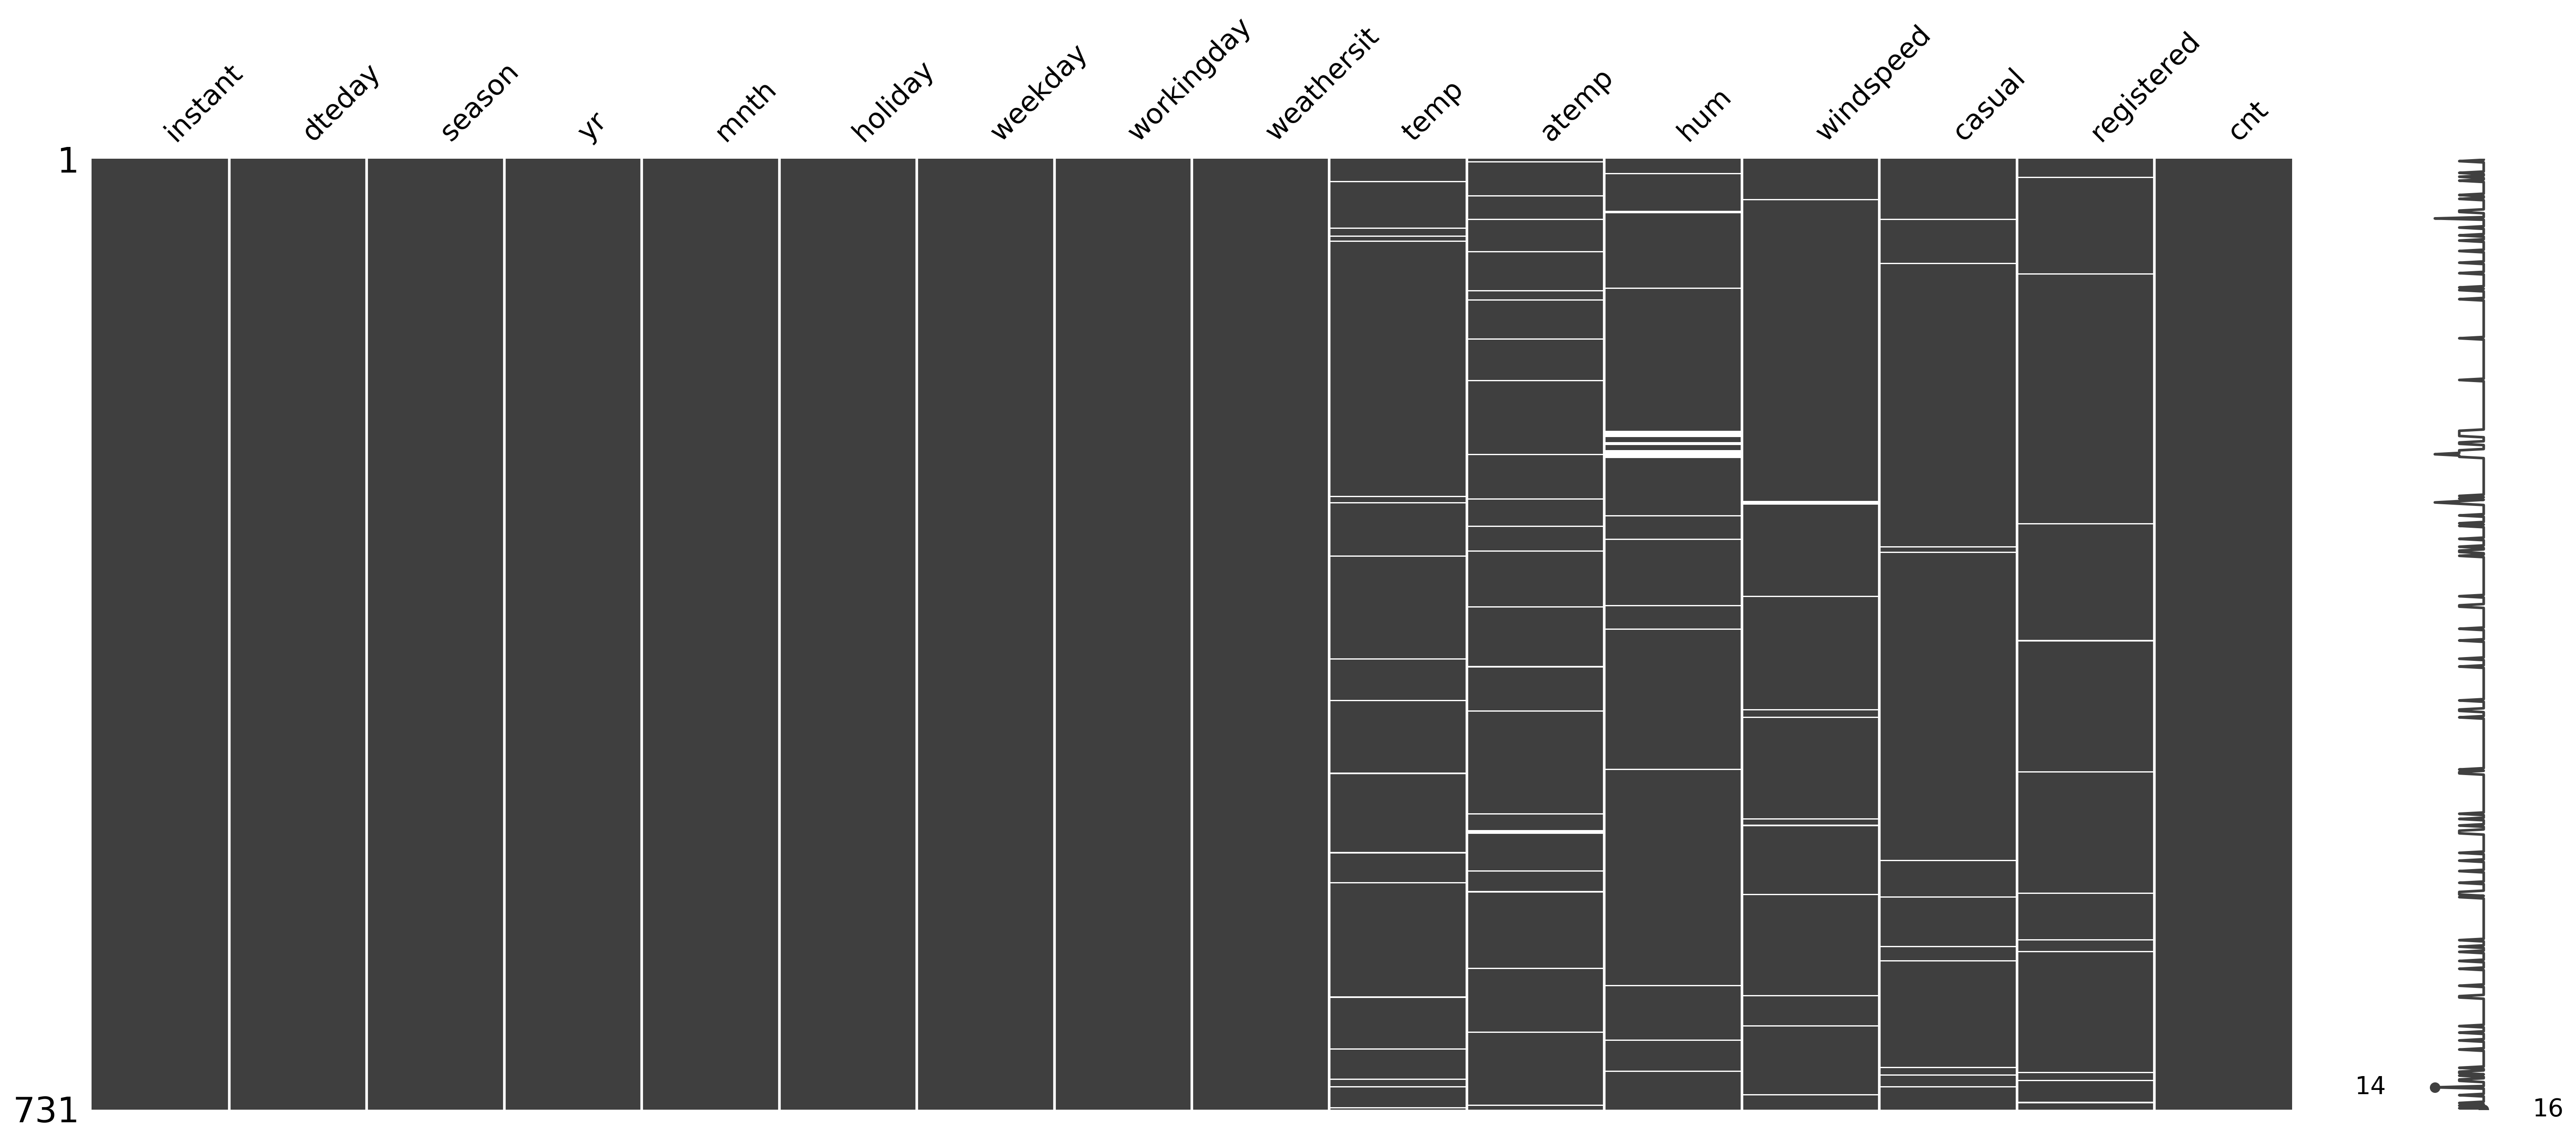

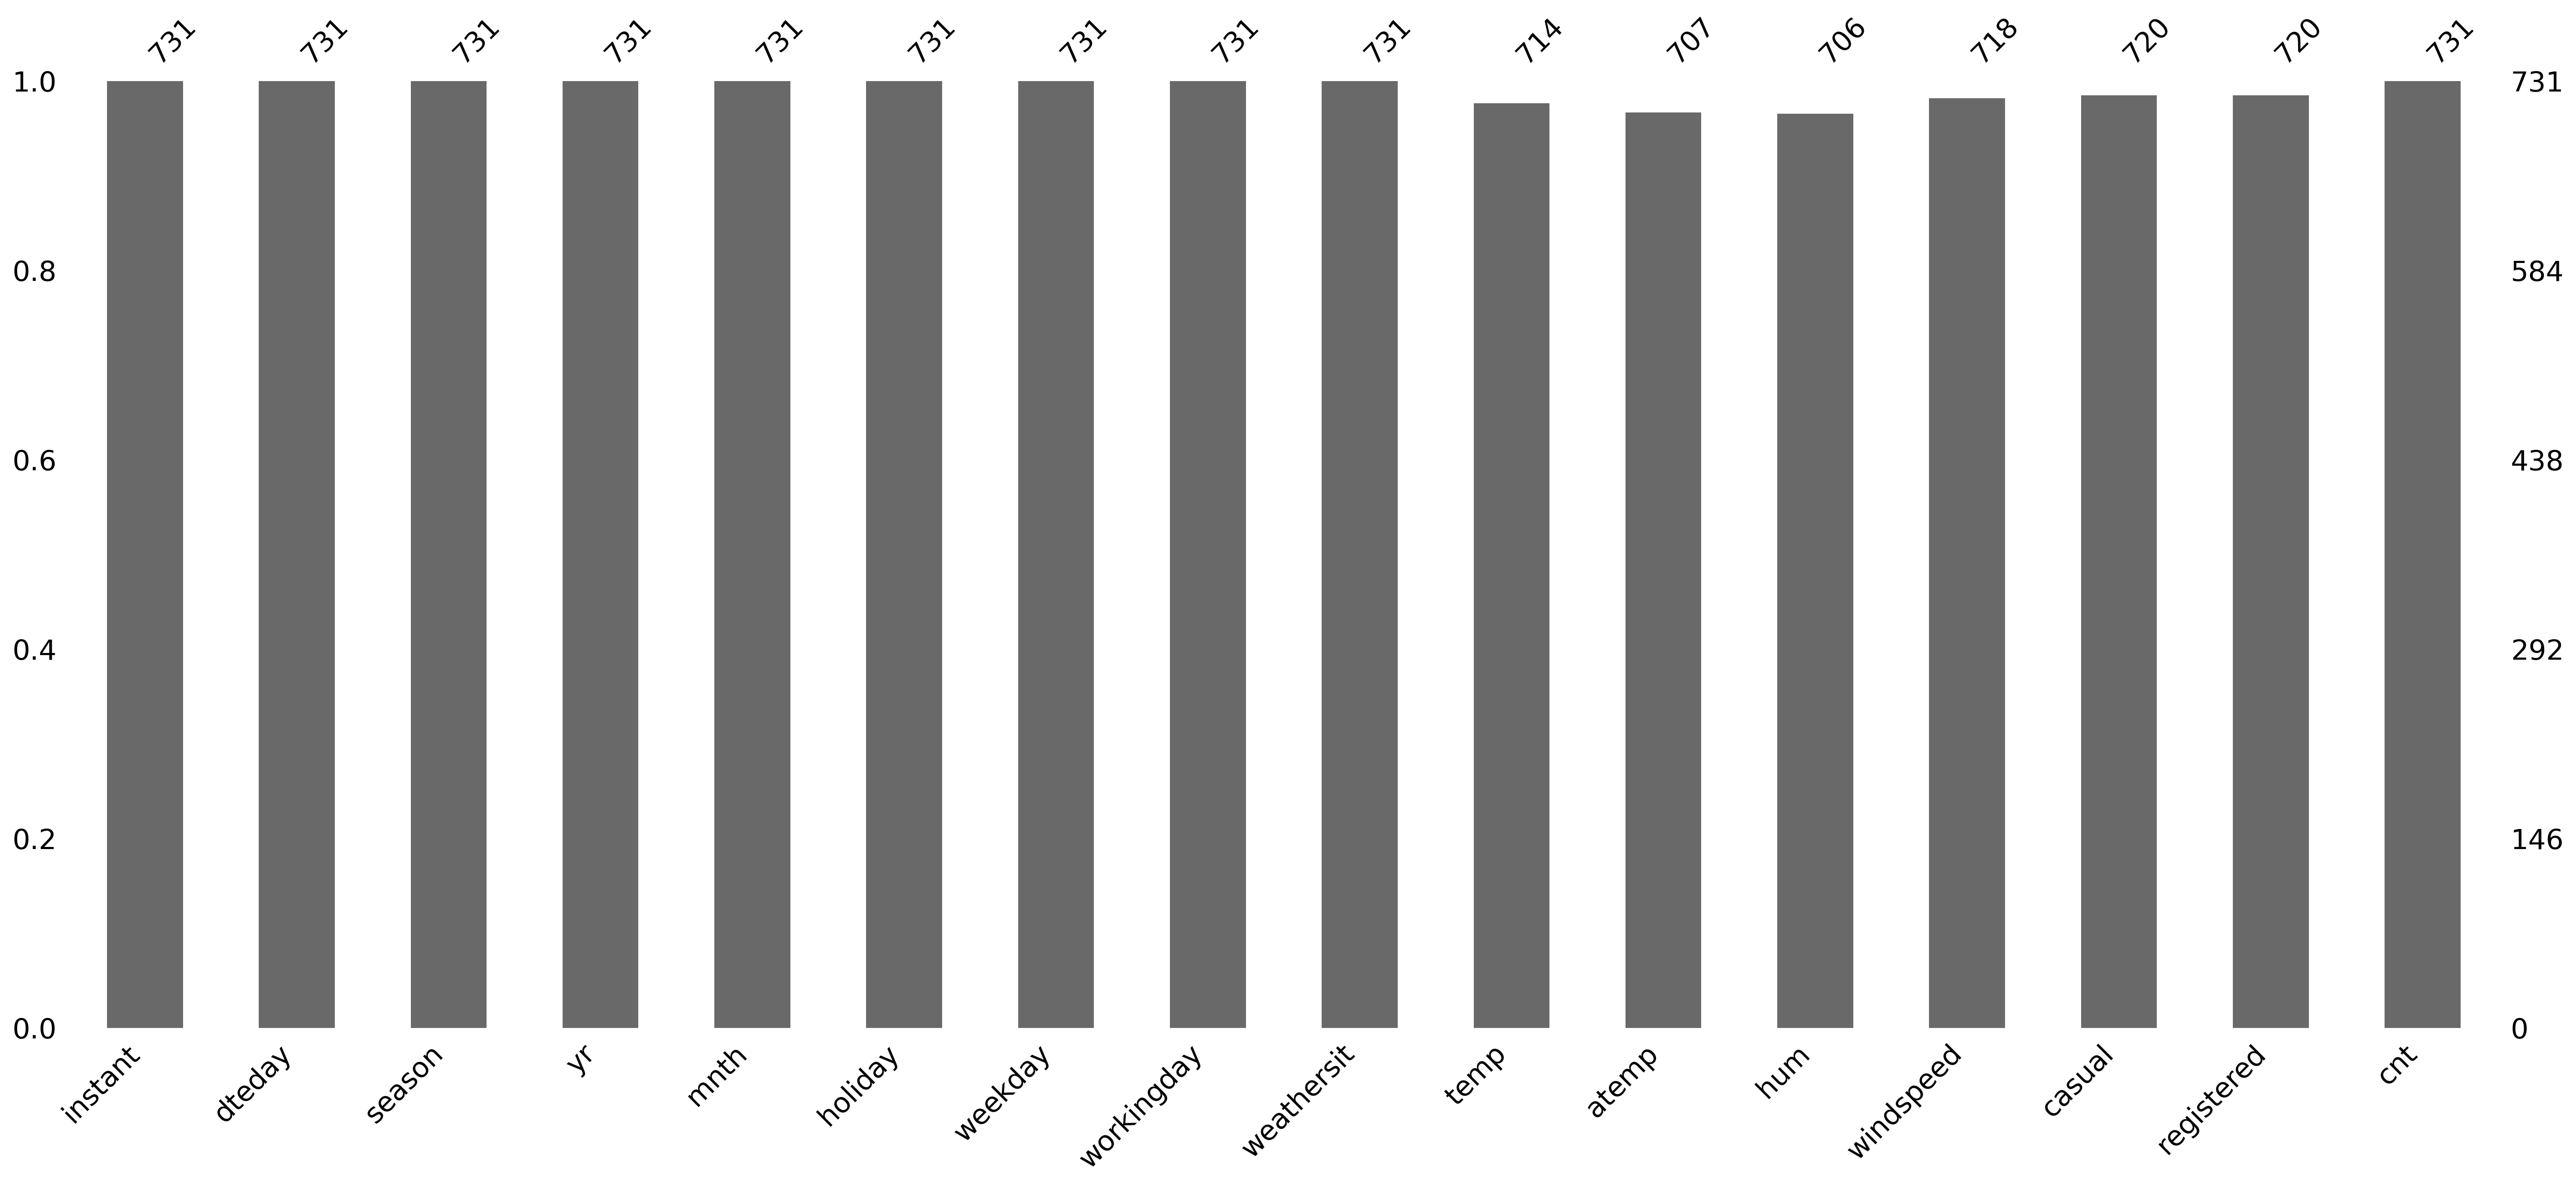

In [ ]:
msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

In [ ]:
def is_emptystring(x):
    return x.eq('').any()

df.apply(lambda x:is_emptystring(x))

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [ ]:
df_drop_all = df.dropna(how='all')

df_drop_3 = df.dropna(thresh=3)
df_drop_slt = df.dropna(subset=['temp'])
df_drop_any = df.dropna(how='any')

df_drop_any.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df_0_all = df.fillna(0)
df_0_slt = df.fillna({'temp':0})

df_mean_all = df.fillna(df.mean())
df_mean_slt = df.fillna({'temp':df['temp'].mean()})

df_median_all = df.fillna(df.median())
df_median_slt = df.fillna({'temp':df['temp'].median()})

df_mode_all = df.fillna(df.mode())
df_mode_slt = df.fillna({'temp':df['temp'].mode()})

df_max_all = df.fillna(df.max())
df_max_slt = df.fillna({'temp':df['temp'].max()})

df_min_all = df.fillna(df.min())
df_min_slt = df.fillna({'temp':df['temp'],'hum':df['hum'].min()})

df_min_slt.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum            0
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [ ]:
df1 = df.copy()
df1['temp'].fillna(method ='pad' ,inplace=True)

df.fillna(method ='bfill')

df.fillna(method='bfill', limit=1)

ts_intp_linear = df.interpolate(method='values')

df['dteday'] = pd.to_datetime(df['dteday'])

df_i = df.set_index('dteday')

df_time = df_i.interpolate(method='time')

df_time.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df_dp = df.drop(['dteday'],axis=1)

imputer=IterativeImputer(imputation_order='ascending',
                         max_iter=10,random_state=42,
                         n_nearest_features=5)

df_imputed = imputer.fit_transform(df_dp)

df_imputed = pd.DataFrame(df_imputed)
df_imputed.columns = ['instant','season','yr','mnth','holiday'
                    ,'weekday','workingday','weathersit','temp'
                    ,'atemp','hum','windspeed','casual','registered','cnt']

df_imputed.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

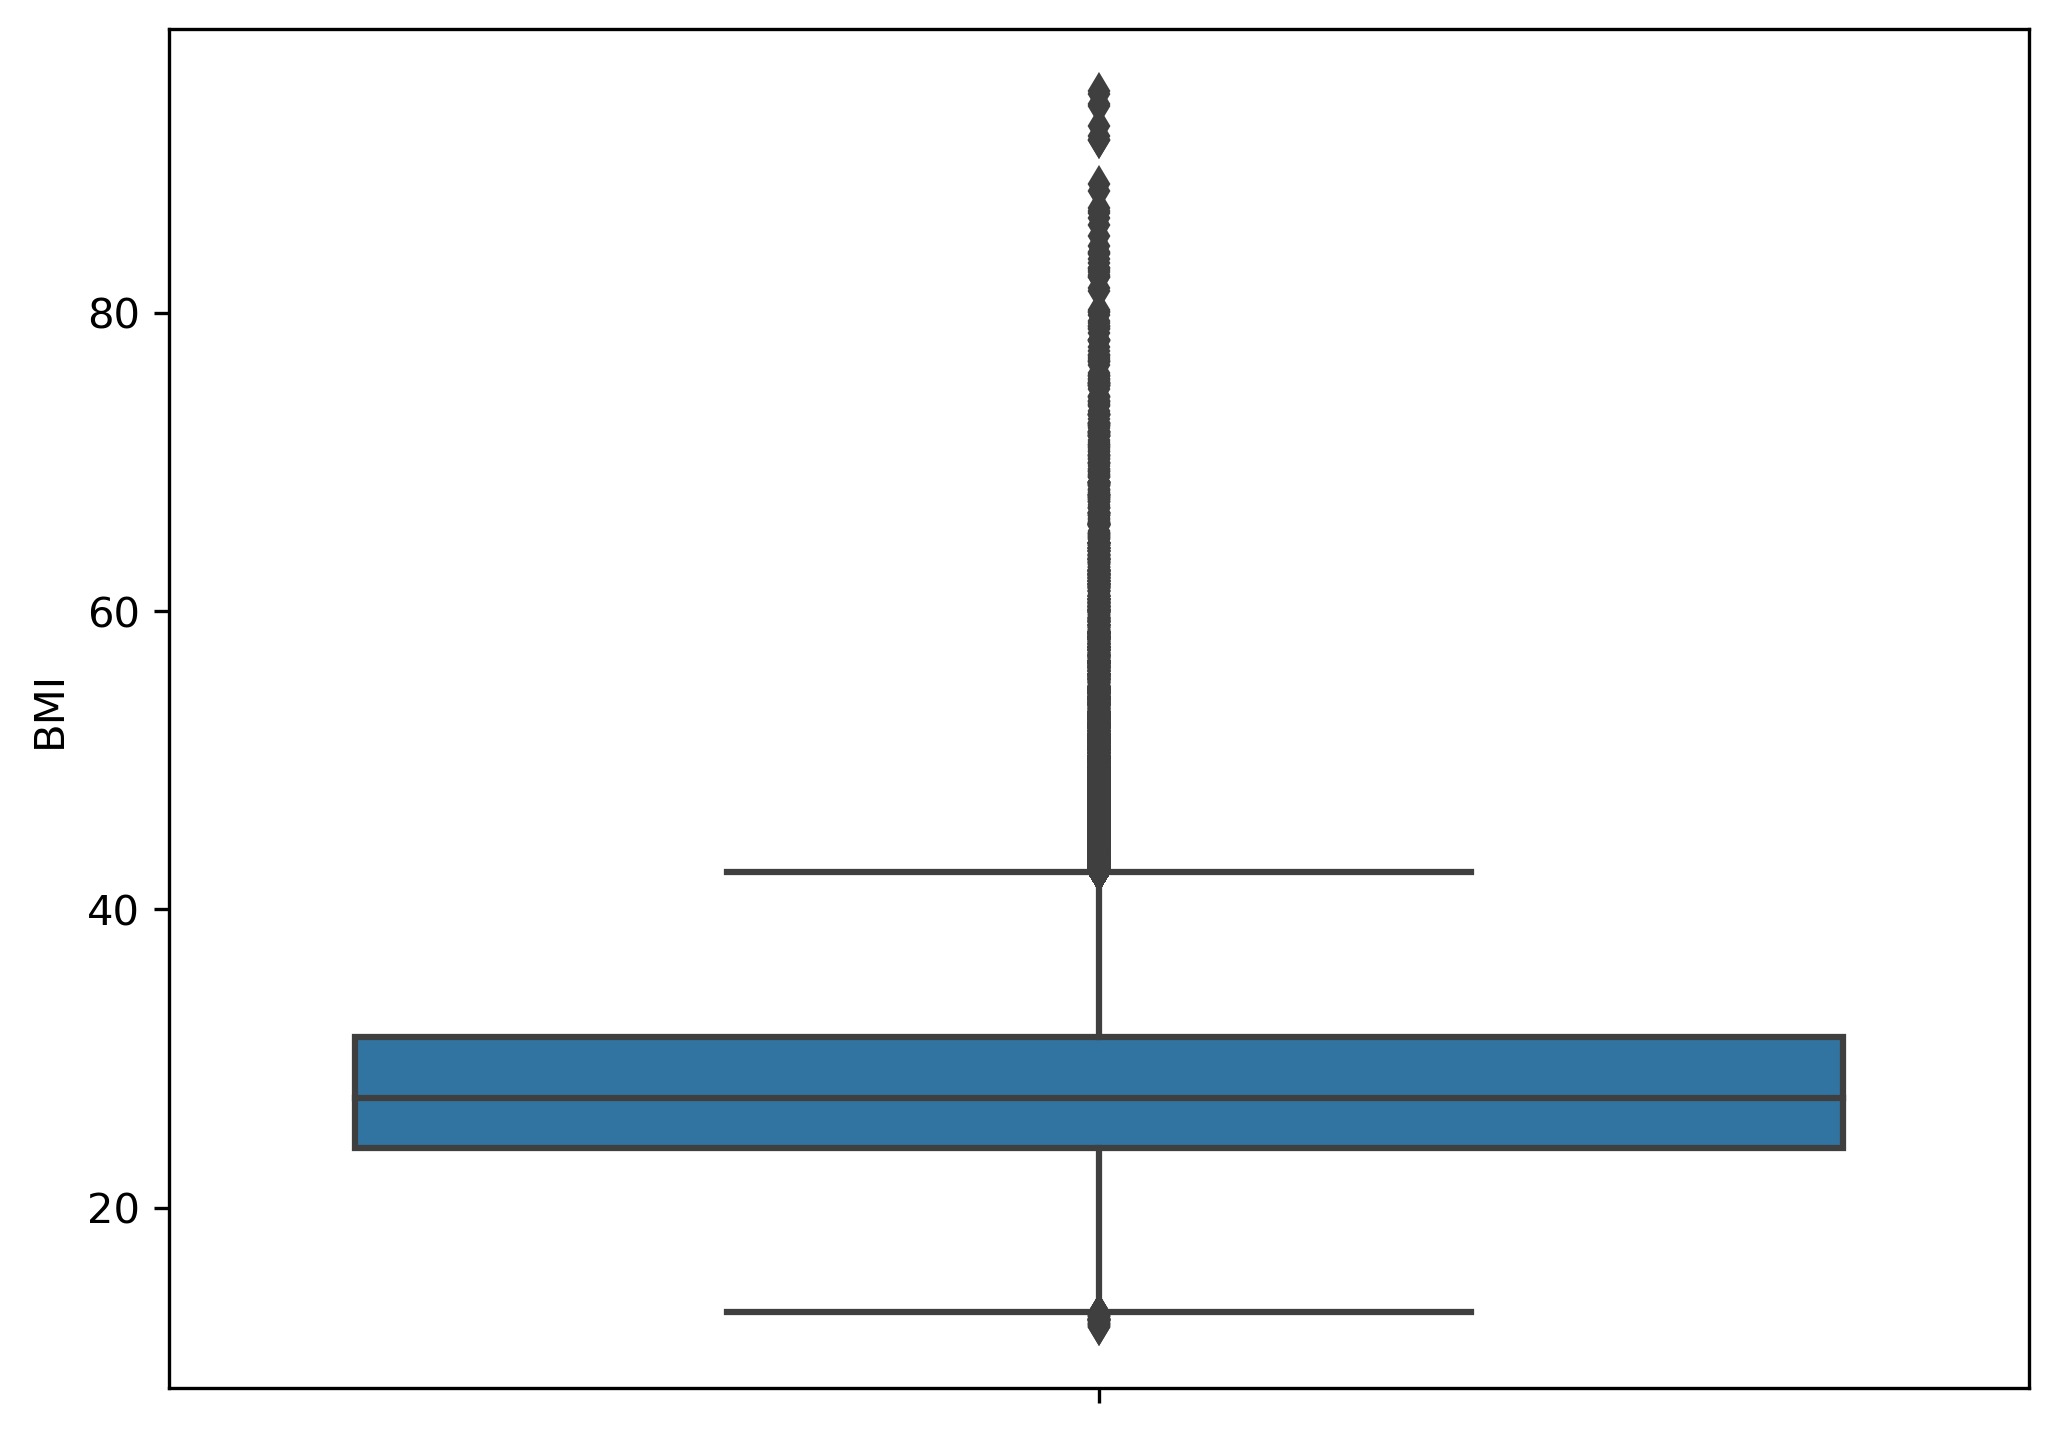

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df)
plt.show()

In [ ]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
rev_range = 3

filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range *IQR)
df_rmv = df.loc[filter]
print(df['BMI'].describe())
print(df_rmv['BMI'].describe())

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


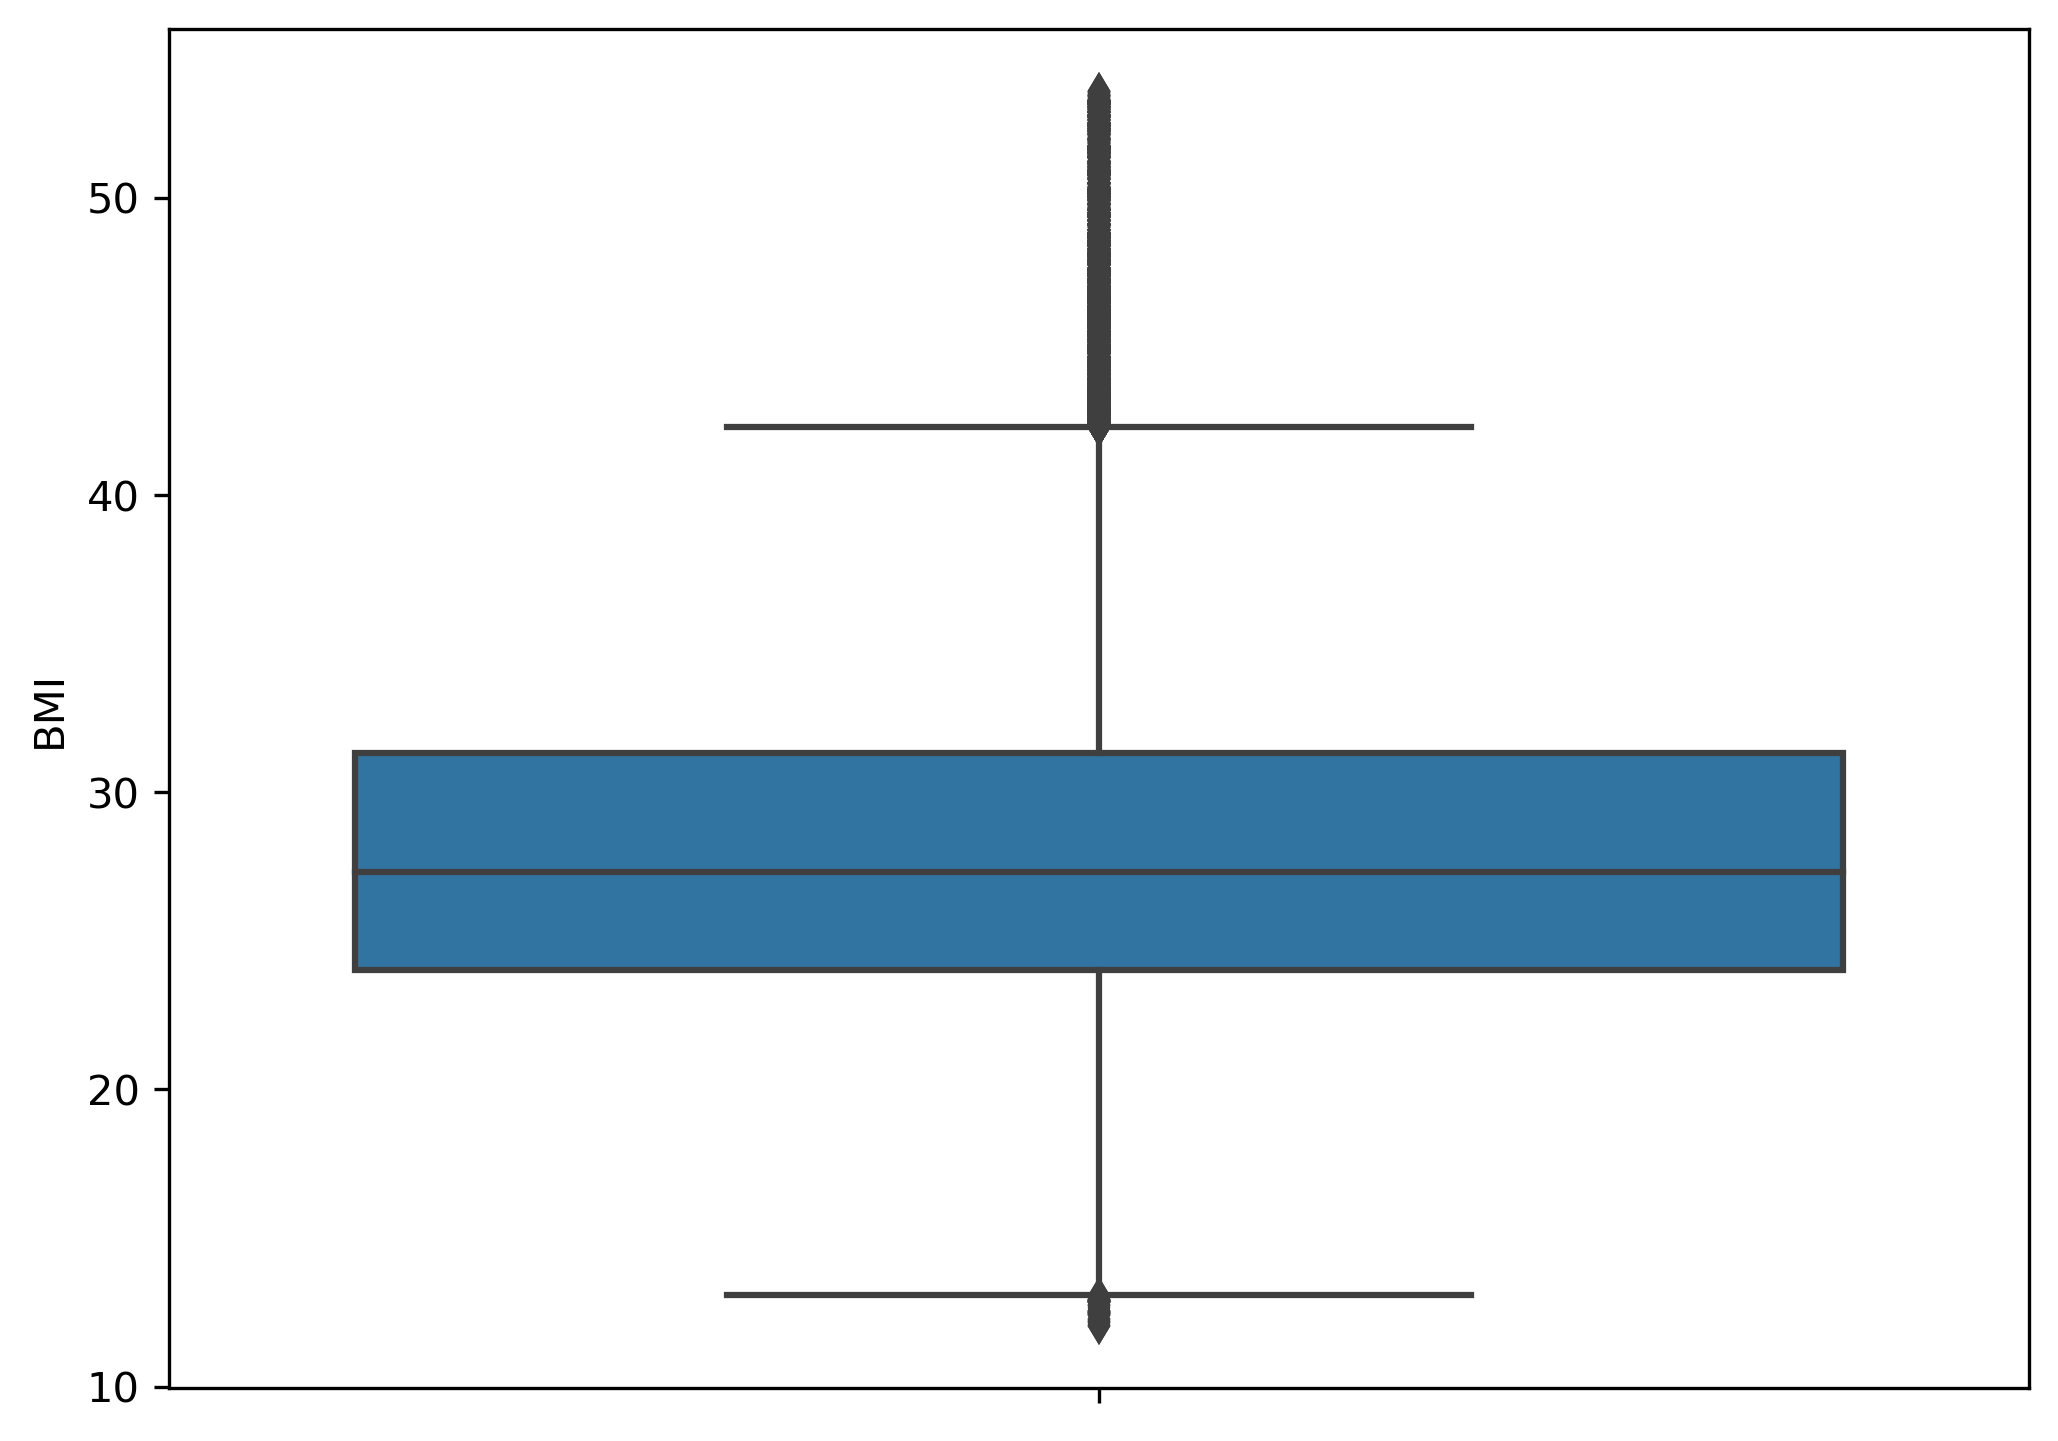

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df_rmv)
plt.show()

In [ ]:
def replace_outlier(value):
    Q1 = df['BMI'].quantile(0.25)
    Q3 = df['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    rev_range = 3

    if ((value < (Q1 - rev_range * IQR))):
        value = Q1 - rev_range * IQR
    if ((value > (Q3 + rev_range * IQR))):
        value = Q3 + rev_range * IQR

    return value
df['BMI'] = df['BMI'].apply(replace_outlier)

print(df['BMI'].describe())

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df)
plt.show()

In [ ]:
!pip install xverse
from xverse.transformer import WOE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/heart_2020_cleaned.csv")

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

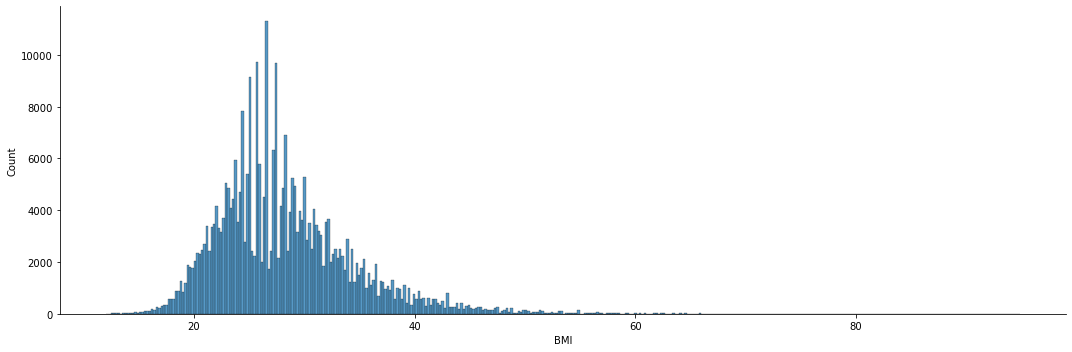

In [ ]:
%matplotlib inline
sns.displot(df['BMI'],height = 5, aspect = 3)

In [ ]:
df1 = df.copy()

df1.insert(2, 'BMI_bin', 0)

df1.loc[df1['BMI'] <= 20, 'BMI_bin'] = 'a'
df1.loc[(df1['BMI'] > 20) & (df1['BMI'] <= 30), 'BMI_bin'] = 'b'
df1.loc[(df1['BMI'] > 30) & (df1['BMI'] <= 40), 'BMI_bin'] = 'c'
df1.loc[(df1['BMI'] > 40) & (df1['BMI'] <= 50), 'BMI_bin'] = 'd'
df1.loc[(df1['BMI'] > 50) & (df1['BMI'] <= 60), 'BMI_bin'] = 'e'
df1.loc[(df1['BMI'] > 60) & (df1['BMI'] <= 70), 'BMI_bin'] = 'f'
df1.loc[df1['BMI'] > 70, 'BMI_bin'] = 'g'

df1.head()

,HeartDisease,BMI,BMI_bin,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


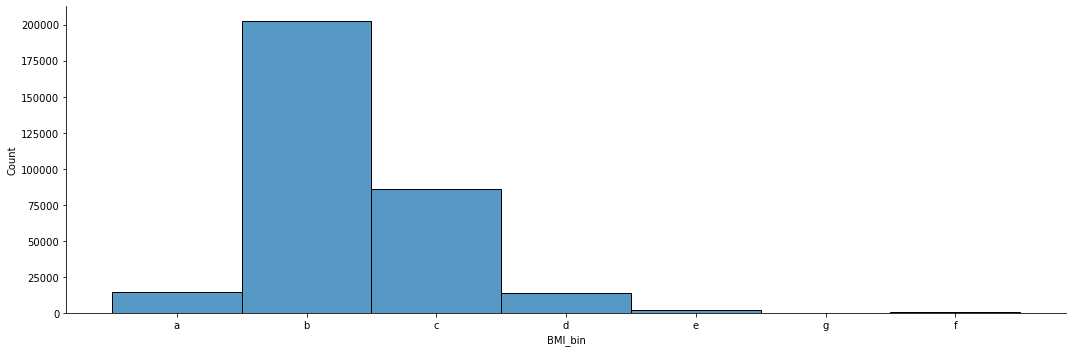

In [ ]:
sns.displot(df1['BMI_bin'],height = 5, aspect = 3)

In [ ]:
df1.insert(3, 'BMI_bin2', 0)

df1['BMI_bin2'] = pd.cut(df1.BMI, bins=[0, 20, 30, 40, 50, 60, 70, 95]
                         , labels=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df1.head()

,HeartDisease,BMI,BMI_bin,BMI_bin2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,a,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,b,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,b,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,b,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,b,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df1.BMI_bin2.value_counts().to_frame().style.background_gradient(cmap='winter')

,BMI_bin2
b,202548
c,86198
a,14699
d,13839
e,2019
f,363
g,129


In [ ]:
df1.insert(4, 'BMI_bin3', 0)
df1['BMI_bin3'] = pd.qcut(df1.BMI, q=7, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df1.head()

,HeartDisease,BMI,BMI_bin,BMI_bin2,BMI_bin3,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,...,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,a,a,Yes,No,No,3.0,30.0,...,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,b,a,No,No,Yes,0.0,0.0,...,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,b,d,Yes,No,No,20.0,30.0,...,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,b,b,No,No,No,0.0,0.0,...,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,b,b,No,No,No,28.0,0.0,...,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df1.BMI_bin3.value_counts().to_frame().style.background_gradient(cmap='winter')

,BMI_bin3
b,47309
a,45980
d,45944
f,45805
g,45255
e,44977
c,44525


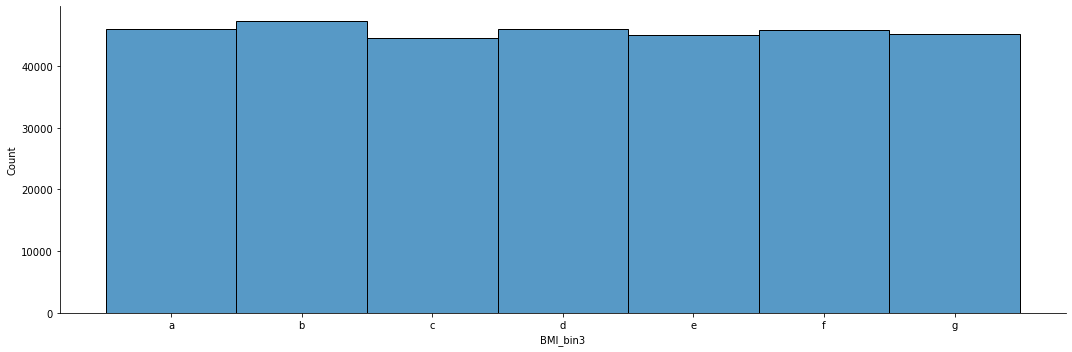

In [ ]:
sns.displot(df1['BMI_bin3'],height = 5, aspect = 3)

In [ ]:
df2 = df.copy()

df2=pd.get_dummies(df)

X = df2[['PhysicalHealth']]
y = df2[['KidneyDisease_Yes']]

y = y.T.squeeze()

clf = WOE()
clf.fit(X, y)

a=clf.woe_df
b=clf.iv_df

a.head()

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,PhysicalHealth,"(-0.001, 1.0]",237078,5719.0,231359.0,0.024123,0.975877,0.485525,0.751127,-0.436343,0.308774
1,PhysicalHealth,"(1.0, 30.0]",82717,6060.0,76657.0,0.073262,0.926738,0.514475,0.248873,0.726202,0.308774


In [ ]:
b.head()

,Variable_Name,Information_Value
0,PhysicalHealth,0.308774


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
print(df.mean())
print('\n')
print(df.var())

Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
dtype: float64


Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64


In [ ]:
StandardScaler = StandardScaler()
df_stand = StandardScaler.fit_transform(df)

df_stand = pd.DataFrame(data=df_stand, columns=df.columns)

df_stand.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
print(df_stand.mean())
print('\n')

print(df_stand.var())

Alcohol                -8.619821e-16
Malic_Acid             -8.357859e-17
Ash                    -8.657245e-16
Ash_Alcanity           -1.160121e-16
Magnesium              -1.995907e-17
Total_Phenols          -2.972030e-16
Flavanoids             -4.016762e-16
Nonflavanoid_Phenols    4.079134e-16
Proanthocyanins        -1.699639e-16
Color_Intensity        -1.247442e-18
Hue                     3.717376e-16
OD280                   2.919013e-16
Proline                -7.484650e-18
dtype: float64


Alcohol                 1.00565
Malic_Acid              1.00565
Ash                     1.00565
Ash_Alcanity            1.00565
Magnesium               1.00565
Total_Phenols           1.00565
Flavanoids              1.00565
Nonflavanoid_Phenols    1.00565
Proanthocyanins         1.00565
Color_Intensity         1.00565
Hue                     1.00565
OD280                   1.00565
Proline                 1.00565
dtype: float64


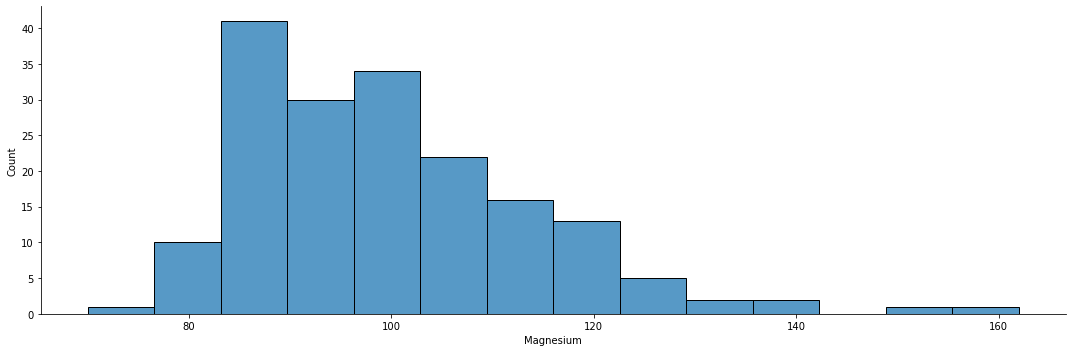

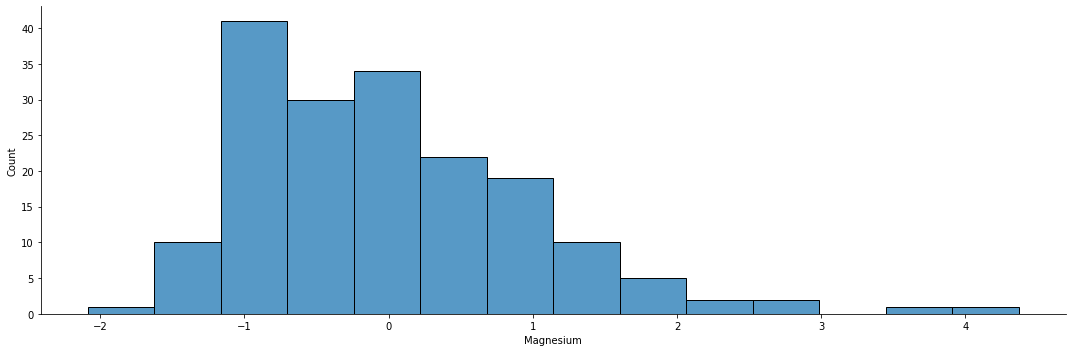

In [ ]:
%matplotlib inline
sns.displot(df['Magnesium'],height = 5, aspect = 3)
sns.displot(df_stand['Magnesium'],height = 5, aspect = 3)

plt.show()

In [ ]:
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df)

df_minmax = pd.DataFrame(data=df_minmax, columns=df.columns)

df_minmax.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [ ]:
print(df_minmax.min())
print('\n')
print(df_minmax.max())

Alcohol                 0.0
Malic_Acid              0.0
Ash                     0.0
Ash_Alcanity            0.0
Magnesium               0.0
Total_Phenols           0.0
Flavanoids              0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins         0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                 0.0
dtype: float64

Alcohol                 1.0
Malic_Acid              1.0
Ash                     1.0
Ash_Alcanity            1.0
Magnesium               1.0
Total_Phenols           1.0
Flavanoids              1.0
Nonflavanoid_Phenols    1.0
Proanthocyanins         1.0
Color_Intensity         1.0
Hue                     1.0
OD280                   1.0
Proline                 1.0
dtype: float64


In [ ]:
print(df_minmax.mean())
print('\n')

print(df_minmax.var())

Alcohol                 0.518584
Malic_Acid              0.315484
Ash                     0.538244
Ash_Alcanity            0.458502
Magnesium               0.323278
Total_Phenols           0.453487
Flavanoids              0.356386
Nonflavanoid_Phenols    0.437460
Proanthocyanins         0.372523
Color_Intensity         0.322363
Hue                     0.388170
OD280                   0.491460
Proline                 0.334446
dtype: float64


Alcohol                 0.045641
Malic_Acid              0.048744
Ash                     0.021523
Ash_Alcanity            0.029633
Magnesium               0.024101
Total_Phenols           0.046574
Flavanoids              0.044407
Nonflavanoid_Phenols    0.055139
Proanthocyanins         0.032600
Color_Intensity         0.039127
Hue                     0.034533
OD280                   0.067636
Proline                 0.050451
dtype: float64


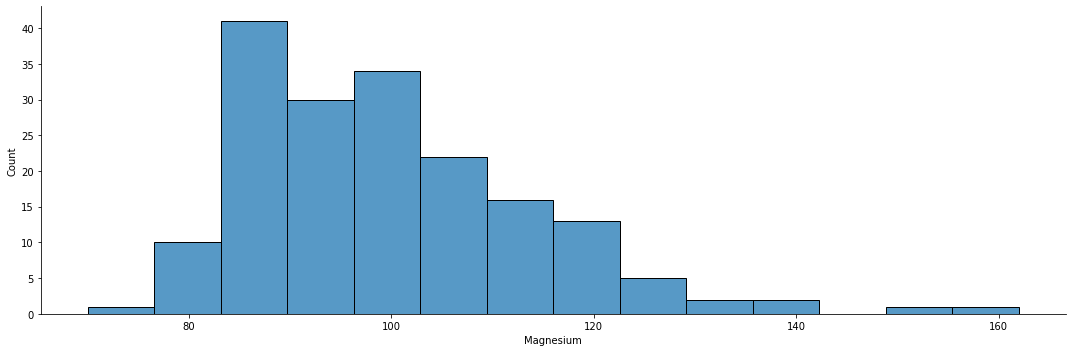

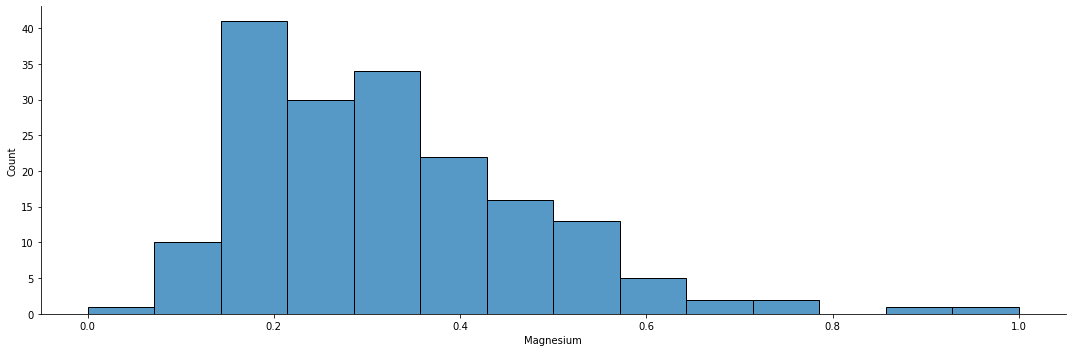

In [ ]:
%matplotlib inline
sns.displot(df['Magnesium'],height = 5, aspect = 3)
sns.displot(df_minmax['Magnesium'],height = 5, aspect = 3)

plt.show()

In [ ]:
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df)


df_robust = pd.DataFrame(data=df_robust, columns=df.columns)

df_robust.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935


In [ ]:
print(df_robust.mean())
print('\n')

print(df_robust.var())

Alcohol                -0.037553
Malic_Acid              0.318479
Ash                     0.018754
Ash_Alcanity           -0.001176
Magnesium               0.091662
Total_Phenols          -0.056631
Flavanoids             -0.063312
Nonflavanoid_Phenols    0.130471
Proanthocyanins         0.051284
Color_Intensity         0.123520
Hue                    -0.022372
OD280                  -0.136564
Proline                 0.151482
dtype: float64


Alcohol                 0.381132
Malic_Acid              0.569766
Ash                     0.623277
Ash_Alcanity            0.603174
Magnesium               0.565067
Total_Phenols           0.350252
Flavanoids              0.357746
Nonflavanoid_Phenols    0.552056
Proanthocyanins         0.668561
Color_Intensity         0.605204
Hue                     0.458666
OD280                   0.331842
Proline                 0.422453
dtype: float64


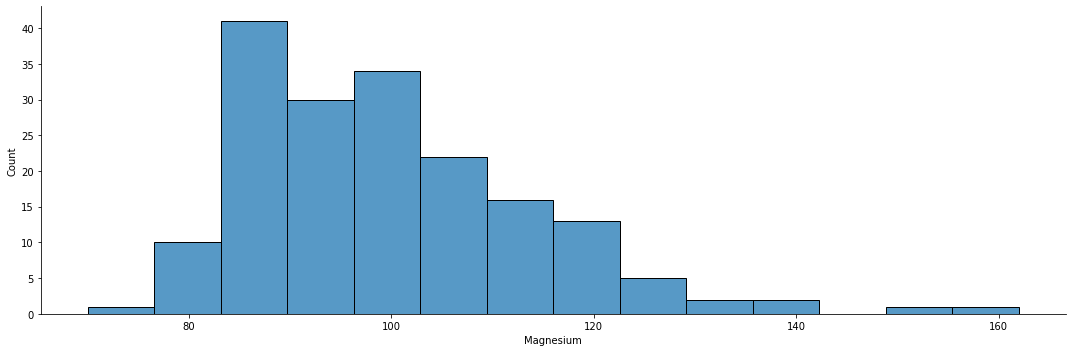

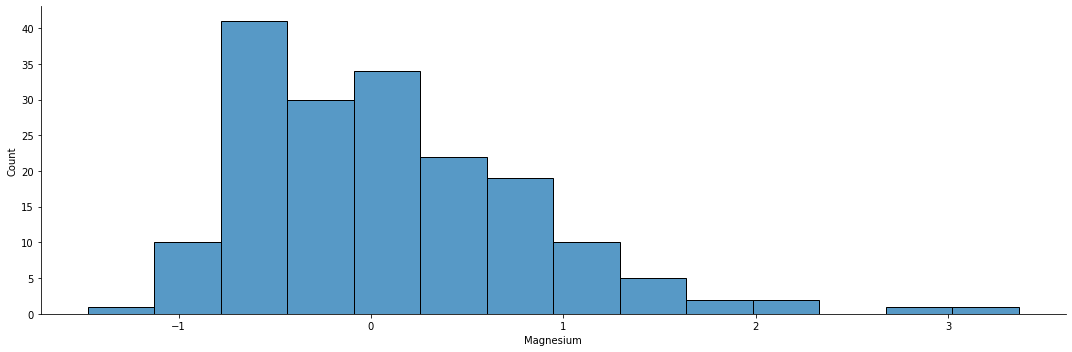

In [ ]:
%matplotlib inline
sns.displot(df['Magnesium'],height = 5, aspect = 3)
sns.displot(df_robust['Magnesium'],height = 5, aspect = 3)

plt.show()

In [ ]:
import math
from sklearn import preprocessing
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/scanner_data.csv")
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [ ]:
df['Unit_amount'] = df['Sales_Amount']/df['Quantity']
df['All_amount'] = \
df[['Quantity', 'Sales_Amount']].apply(lambda series: series.prod(), axis=1)

df.tail()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46,2.153333,19.38
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50,4.500000,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19,5.190000,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000,4.57
131705,131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68,13.680000,13.68


In [ ]:
df['Sales_Amount_log'] = preprocessing.scale(np.log(df['Sales_Amount']+1))
df['Sales_Amount_log2'] = df[['Sales_Amount']].apply(lambda x: np.log(x+1)))
df['Sales_Amount_sqrt'] = np.sqrt(df['Sales_Amount']+1)
df['Sales_Amount_pow'] = pow(df[['Sales_Amount']],2)

df.tail()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,Sales_Amount_log,Sales_Amount_log2,Sales_Amount_sqrt,Sales_Amount_pow
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46,2.153333,19.38,-0.204581,2.009555,2.731300,41.7316
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50,4.500000,4.50,-0.592329,1.704748,2.345208,20.2500
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19,5.190000,5.19,-0.441982,1.822935,2.487971,26.9361
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000,4.57,-0.576240,1.717395,2.360085,20.8849
131705,131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68,13.680000,13.68,0.656548,2.686486,3.831449,187.1424


In [ ]:
df['Date2']= pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Year'] = df['Date2'].dt.year
df['Month'] = df['Date2'].dt.month

df_sm = df.groupby(['Year',
                    'Month',
                    'Customer_ID'])['Sales_Amount'].agg(['sum','mean']).reset_index()

df2 = pd.merge(df, df_sm, how='left')

df2.head()

C:\Users\angry\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\angry\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\angry\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\angry\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2016' in DD/MM/YYYY format. Provide format or specif

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,...,Sales_Amount_log2,Sales_Amount_sqrt,Sales_Amount_pow,Date2,Year,Month,Year_1_m,Month_1_m,sum,mean
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,1.418277,2.032240,9.7969,2016-02-01,2016,2,2016,2,24.76,6.190000
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,1.865629,2.541653,29.8116,2016-02-01,2016,2,2016,2,5.46,5.460000
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,1.994700,2.711088,40.3225,2016-02-01,2016,2,2016,2,73.17,5.628462
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,1.885553,2.567100,31.2481,2016-02-01,2016,2,2016,2,171.15,8.150000
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,2.064328,2.807134,47.3344,2016-02-01,2016,2,2016,2,6.88,6.880000


In [ ]:
df2['Sales_Amount_Diff'] = df2['mean'] - df2['Sales_Amount']
df2['Sales_Amount_UD'] = df2['Sales_Amount'] / df2['mean']
df2['Sales_Amount_Rto'] = df2['Sales_Amount']/df2['sum']

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,...,Sales_Amount_sqrt,Sales_Amount_pow,Date2,Year,Month,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,2.032240,9.7969,2016-02-01,2016,2,24.76,6.190000,3.060000,0.505654,0.126414
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,2.541653,29.8116,2016-02-01,2016,2,5.46,5.460000,0.000000,1.000000,1.000000
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,2.711088,40.3225,2016-02-01,2016,2,73.17,5.628462,-0.721538,1.128195,0.086784
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,2.567100,31.2481,2016-02-01,2016,2,171.15,8.150000,2.560000,0.685890,0.032661
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,2.807134,47.3344,2016-02-01,2016,2,6.88,6.880000,0.000000,1.000000,1.000000


In [ ]:
df2['Date2_1_m'] = df2['Date2'] + timedelta(weeks=4)
df['Year_1_m'] = df2['Date2_1_m'].dt.year
df['Month_1_m'] = df2['Date2_1_m'].dt.month

df_Mn_1 = df.groupby(['Year_1_m',
                      'Month_1_m',
                      'Customer_ID'])['Sales_Amount'].agg(['sum',
                                                           'mean']).reset_index()

df_Mn_1.rename(columns={'Year_1_m':'Year',
                        'Month_1_m':'Month',
                        'sum':"sum_1_m",
                        'mean':'mean_1_m'}, inplace=True)

df2 = pd.merge(df2, df_Mn_1, how='left')

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,...,Year,Month,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto,Date2_1_m,sum_1_m,mean_1_m
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,2016,2,24.76,6.190000,3.060000,0.505654,0.126414,2016-02-29,14.32,4.773333
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,2016,2,5.46,5.460000,0.000000,1.000000,1.000000,2016-02-29,14.05,3.512500
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,2016,2,73.17,5.628462,-0.721538,1.128195,0.086784,2016-02-29,107.83,7.188667
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,2016,2,171.15,8.150000,2.560000,0.685890,0.032661,2016-02-29,13.21,6.605000
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,2016,2,6.88,6.880000,0.000000,1.000000,1.000000,2016-02-29,6.88,6.880000


In [ ]:
df2['Mn_diff_1_mean'] = df2['mean'] - df2['mean_1_m']
df2['Mn_diff_1_sum'] = df2['sum'] - df2['sum_1_m']

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,...,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto,Date2_1_m,sum_1_m,mean_1_m,Mn_diff_1_mean,Mn_diff_1_sum
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,24.76,6.190000,3.060000,0.505654,0.126414,2016-02-29,14.32,4.773333,1.416667,10.44
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,5.46,5.460000,0.000000,1.000000,1.000000,2016-02-29,14.05,3.512500,1.947500,-8.59
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,73.17,5.628462,-0.721538,1.128195,0.086784,2016-02-29,107.83,7.188667,-1.560205,-34.66
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,171.15,8.150000,2.560000,0.685890,0.032661,2016-02-29,13.21,6.605000,1.545000,157.94
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,6.88,6.880000,0.000000,1.000000,1.000000,2016-02-29,6.88,6.880000,0.000000,0.00


In [ ]:
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd

In [ ]:
df_raw=pd.read_csv("datasets/shopping_mall.csv")

df_raw.head()

,cust_id,dt,ym,sale_amt
0,AFG4127094465,2021-12-09,202112,300000
1,AFG4127094465,2022-04-22,202204,45000
2,AFG4136725677,2022-04-07,202204,47800
3,AFG4140129314,2022-02-07,202202,39200
4,AFG4144923657,2022-05-11,202205,110000


In [ ]:
df_raw['Date2']= pd.to_datetime(df_raw['dt'])

ym_li = [f"YM_M{i}" for i in range(6)]
ym_li

for i in range(len(ym_li)):
    col = ym_li[i]
    now = pd.to_datetime('2022-05-01') + relativedelta(months=-i)
    df_raw[col] = 'M' + (-np.floor((df_raw.Date2 - now)
                                   /np.timedelta64(1, 'M'))).astype(int).astype(str)

df_raw.head()

,cust_id,dt,ym,sale_amt,Date2,YM_M0,YM_M1,YM_M2,YM_M3,YM_M4,YM_M5
0,AFG4127094465,2021-12-09,202112,300000,2021-12-09,M5,M4,M3,M2,M1,M0
1,AFG4127094465,2022-04-22,202204,45000,2022-04-22,M1,M0,M-1,M-2,M-3,M-4
2,AFG4136725677,2022-04-07,202204,47800,2022-04-07,M1,M0,M-1,M-2,M-3,M-4
3,AFG4140129314,2022-02-07,202202,39200,2022-02-07,M3,M2,M1,M0,M-1,M-2
4,AFG4144923657,2022-05-11,202205,110000,2022-05-11,M0,M-1,M-2,M-3,M-4,M-5


In [ ]:
m_col = ["M{}".format(i) for i in range(6)]
df_li = []

for n, ym in enumerate(ym_li):
    tmp = df_raw[(df_raw[ym].isin(m_col)) & (df_raw['sale_amt'] > 0)]
    tmp = tmp.pivot_table(index='cust_id',
                          columns=ym, values='sale_amt',
                          aggfunc='sum')

    missing_col = list(set(m_col) - set(tmp.columns))
    for col in missing_col :
        tmp[col] = 0

    tmp.columns = [f'slae_amt_{c}' for c in tmp.columns]
    tmp['MM_DIFF'] = ym
    tmp = tmp.fillna(0)

    df_li.append(tmp)

final_df = pd.concat(df_li).reset_index()
final_df.head()

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
0,AFG4127094465,0.0,45000.0,0.0,0.0,0.0,300000.0,YM_M0
1,AFG4136725677,0.0,47800.0,0.0,0.0,0.0,0.0,YM_M0
2,AFG4140129314,0.0,0.0,0.0,39200.0,0.0,0.0,YM_M0
3,AFG4144923657,110000.0,0.0,0.0,0.0,0.0,0.0,YM_M0
4,AFG4154711536,0.0,0.0,0.0,45000.0,0.0,0.0,YM_M0


In [ ]:
df1 = final_df[(final_df['cust_id']=='AFG6825009314')]

df1

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
832,AFG6825009314,0.0,0.0,0.0,0.0,0.0,39200.0,YM_M0
1442,AFG6825009314,0.0,0.0,0.0,0.0,39200.0,0.0,YM_M1
1849,AFG6825009314,0.0,0.0,0.0,39200.0,0.0,0.0,YM_M2
2166,AFG6825009314,0.0,0.0,39200.0,0.0,0.0,0.0,YM_M3
2399,AFG6825009314,0.0,39200.0,0.0,0.0,0.0,0.0,YM_M4
2529,AFG6825009314,39200.0,0.0,0.0,0.0,0.0,0.0,YM_M5


In [ ]:
final_df.tail(10)

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
2523,AFG6544053758,78400.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2524,AFG6555046283,278000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2525,AFG6575203354,99000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2526,AFG6683774364,28000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2527,AFG6728543455,89000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2528,AFG6777275172,149000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2529,AFG6825009314,39200.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2530,AFG6838532849,99000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2531,AFG6846099516,129000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2532,AFG6860414162,139000.0,0.0,0.0,0.0,0.0,0.0,YM_M5


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/GPU_CPU_benchmark.csv")
df.head()

,Device Name,Compute Type,OS,Median Score
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,CPU,Linux,78.570
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,CPU,Windows,297.940
2,2X 12th Gen Intel Core i9-12900KF,CPU,Windows,424.470
3,2X AMD EPYC 7343 16-Core Processor,CPU,Linux,439.210
4,2X AMD Opteron Processor 6276,CPU,Windows,81.478


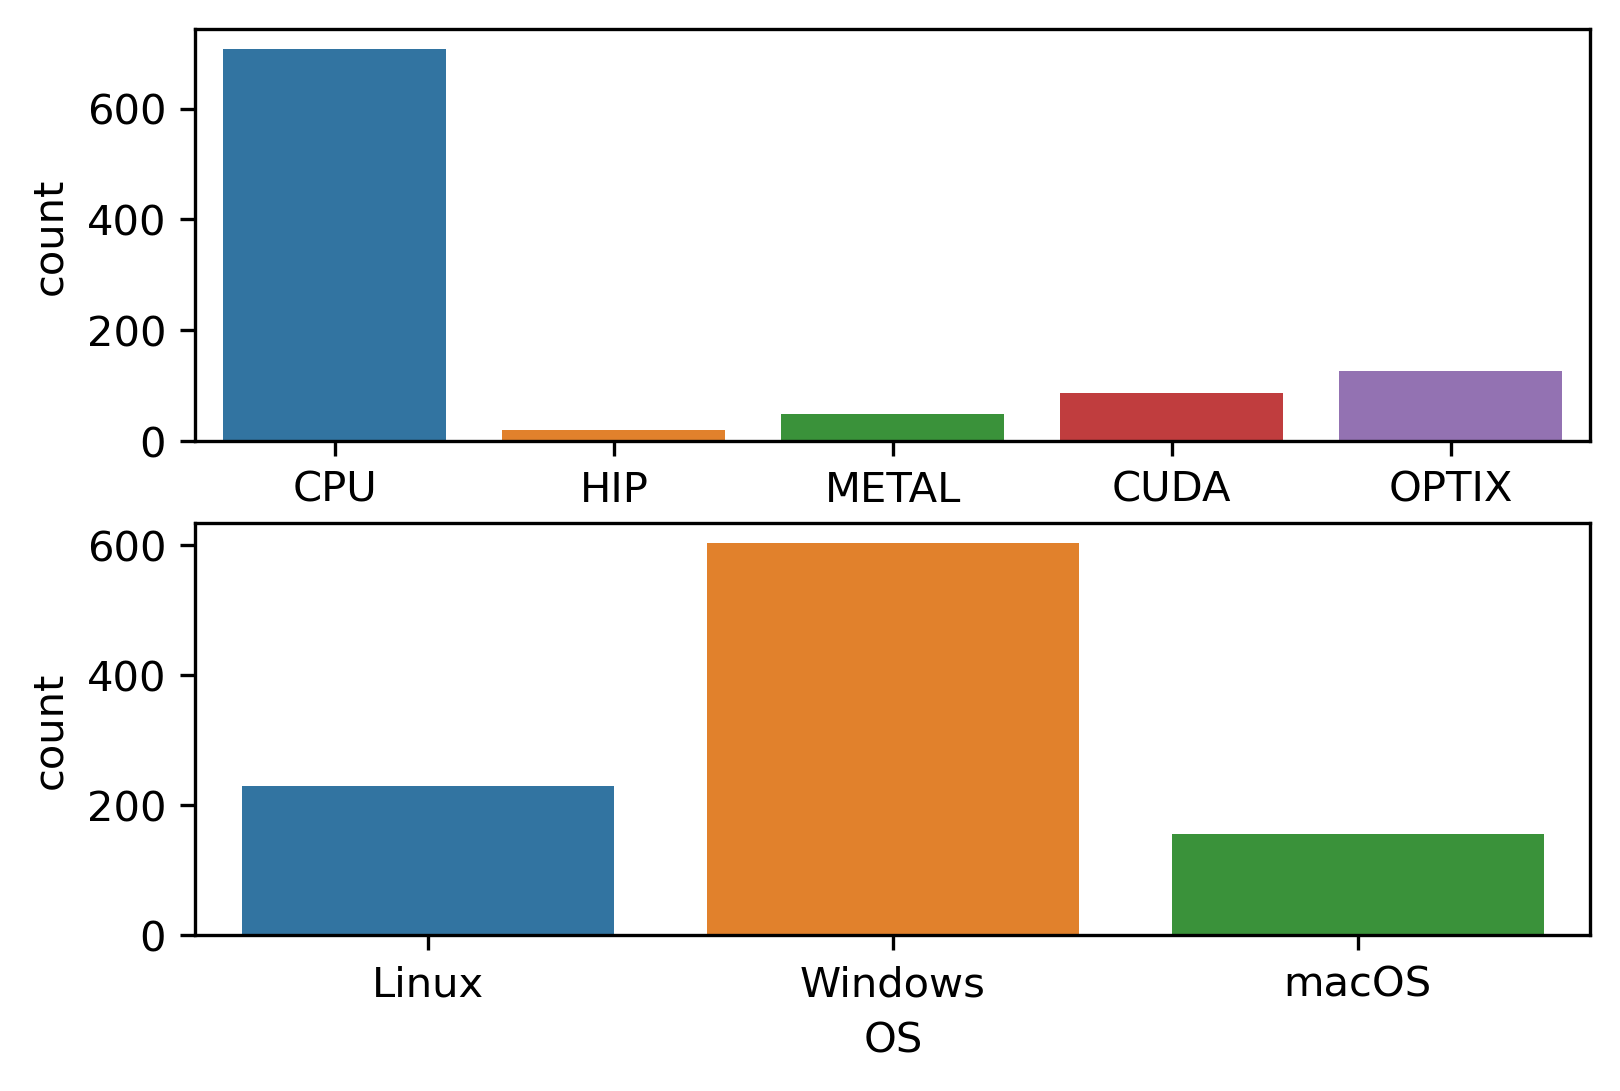

In [ ]:
fig, ax = plt.subplots(nrows=2)

sns.countplot(x="Compute Type", data=df, ax=ax[0])
sns.countplot(x="OS", data=df, ax=ax[1])

plt.show()

In [ ]:
df1 = pd.get_dummies(df)
df1.head()

,Median Score,Device Name_12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,Device Name_24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,Device Name_2X 12th Gen Intel Core i9-12900KF,Device Name_2X AMD EPYC 7343 16-Core Processor,Device Name_2X AMD Opteron Processor 6276,Device Name_2X AMD Opteron(tm) Processor 6328,Device Name_2X AMD Ryzen Threadripper PRO 3995WX 64-Cores,Device Name_2X Genuine Intel CPU 0000 @ 2.00GHz,Device Name_2X Genuine Intel CPU 0000 @ 2.10GHz,...,Device Name_T500,Device Name_Virtual CPU @ 2.99GHz,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,78.570,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,297.940,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,424.470,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,439.210,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,81.478,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df2 = pd.get_dummies(df, columns = ['Compute Type', 'OS'])
df2.head()

,Device Name,Median Score,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,1,0,0,0,0,1,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,1,0,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,1,0,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,1,0,0,0,0,1,0,0
4,2X AMD Opteron Processor 6276,81.478,1,0,0,0,0,0,1,0


In [ ]:
df3 = pd.get_dummies(df, columns = ['Compute Type','OS'],drop_first=True)
df3.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,1,0


In [ ]:
df4 = pd.get_dummies(df, columns = ['Compute Type','OS']
                     , drop_first=True, dummy_na=True)
df4.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,Compute Type_nan,OS_Windows,OS_macOS,OS_nan
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,0,1,0,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,0,1,0,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,0,1,0,0


In [ ]:
!pip install imbalanced-learn==0.7.0
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


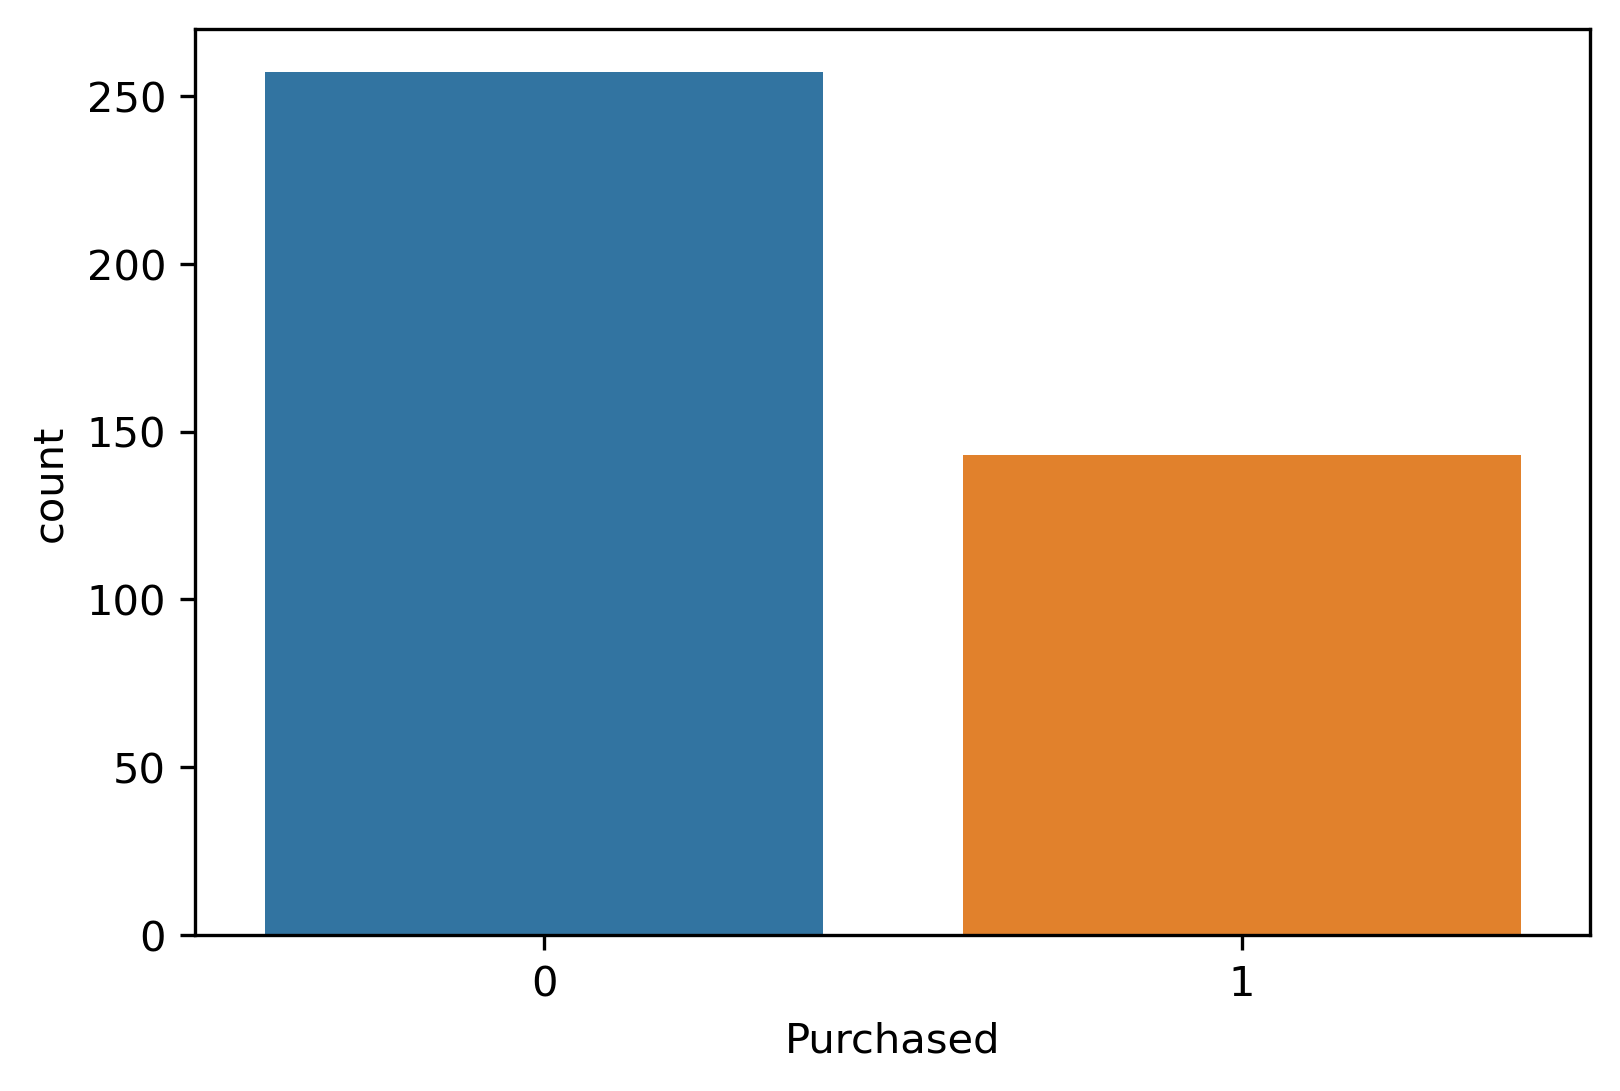

In [ ]:
sns.countplot(x="Purchased", data=df)
plt.show()

In [ ]:
df_d = pd.get_dummies(df['Gender'])
df2 = pd.merge(df.drop(['Gender'], axis=1),
               df_d['Male'],left_index=True, right_index=True,how = 'inner')
df2.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [ ]:
X = df2.drop(['Purchased'], axis=1)
y = df2[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=10)

X_train.head()

,User ID,Age,EstimatedSalary,Male
57,15807481,28,79000,1
87,15631912,28,85000,0
357,15671387,41,72000,0
355,15606472,60,34000,1
238,15617877,46,82000,0


In [ ]:
X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train,y_train)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['Purchased']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (300, 4) (300, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (224, 4) (224, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 0    188
1    112
Name: Purchased, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 1    112
0    112
Name: Purchased, dtype: int64


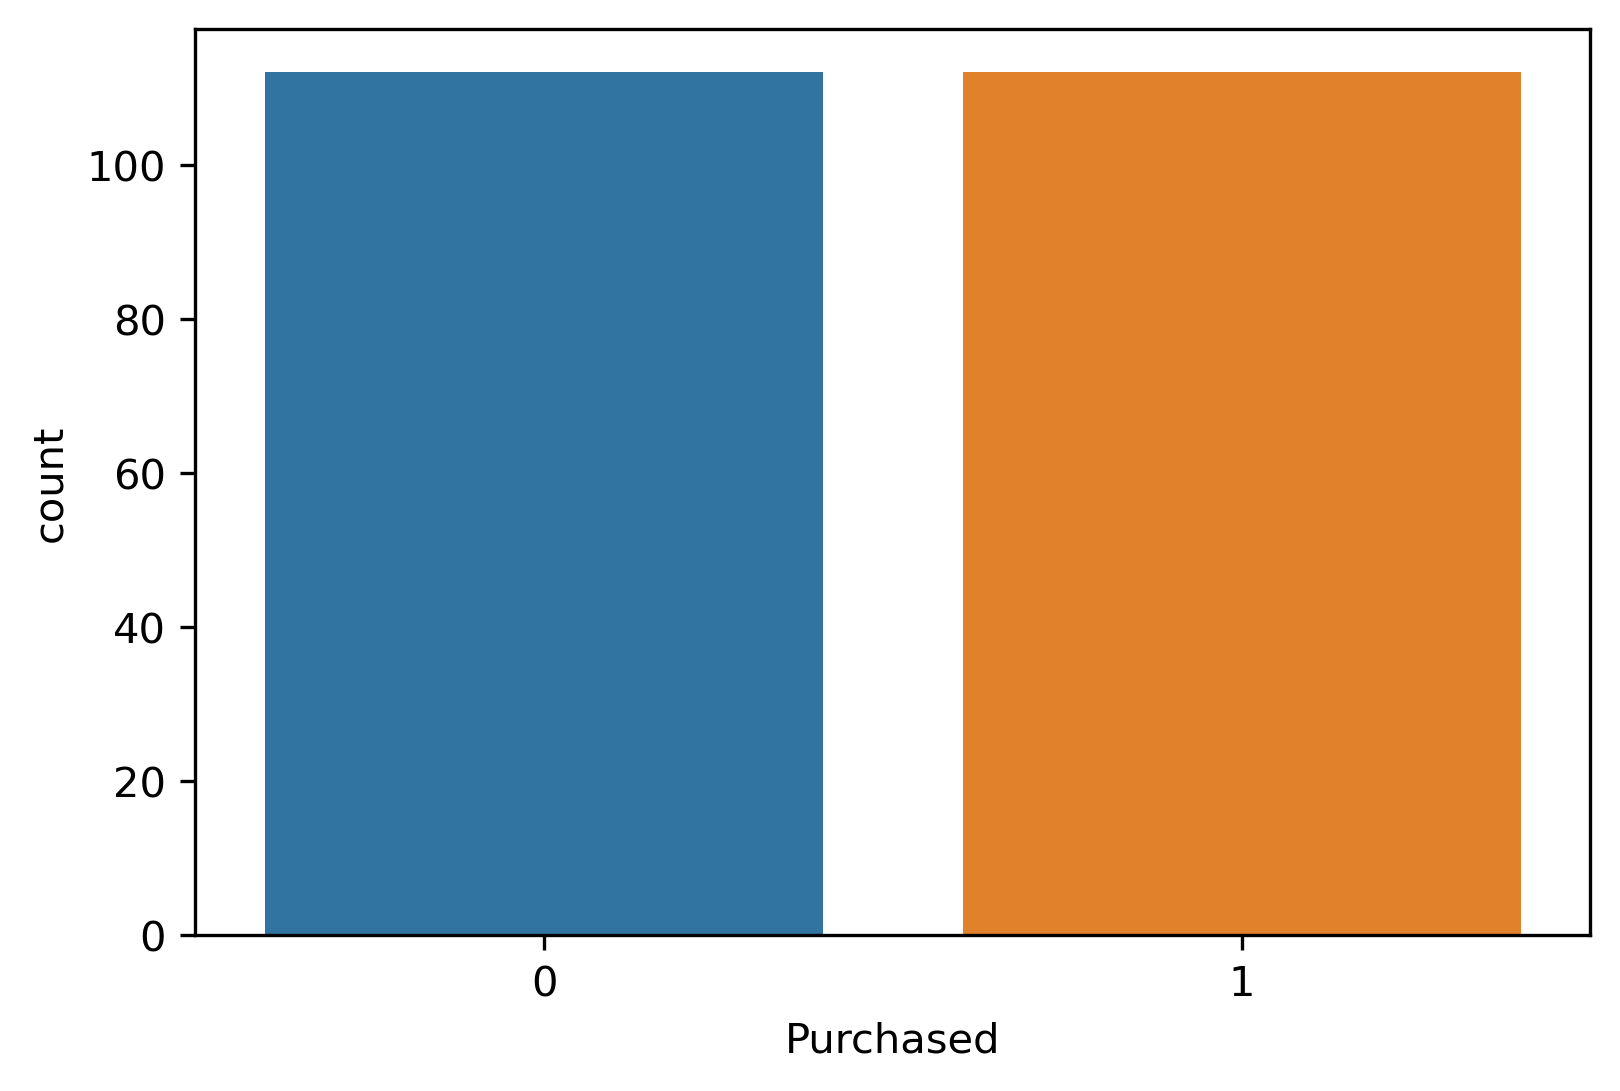

In [ ]:
sns.countplot(x="Purchased", data=y_train_under)
plt.show()

In [ ]:
smote = SMOTE(k_neighbors = 2, random_state=0)
oversample = SMOTE()

X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 변수/레이블 데이터 세트: '
      , X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_over['Purchased']).value_counts())

SMOTE 적용 전 학습용 변수/레이블 데이터 세트:  (300, 4) (300, 1)
SMOTE 적용 후 학습용 변수/레이블 데이터 세트:  (376, 4) (376, 1)
SMOTE 적용 전 레이블 값 분포: 
 0    188
1    112
Name: Purchased, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 1    188
0    188
Name: Purchased, dtype: int64


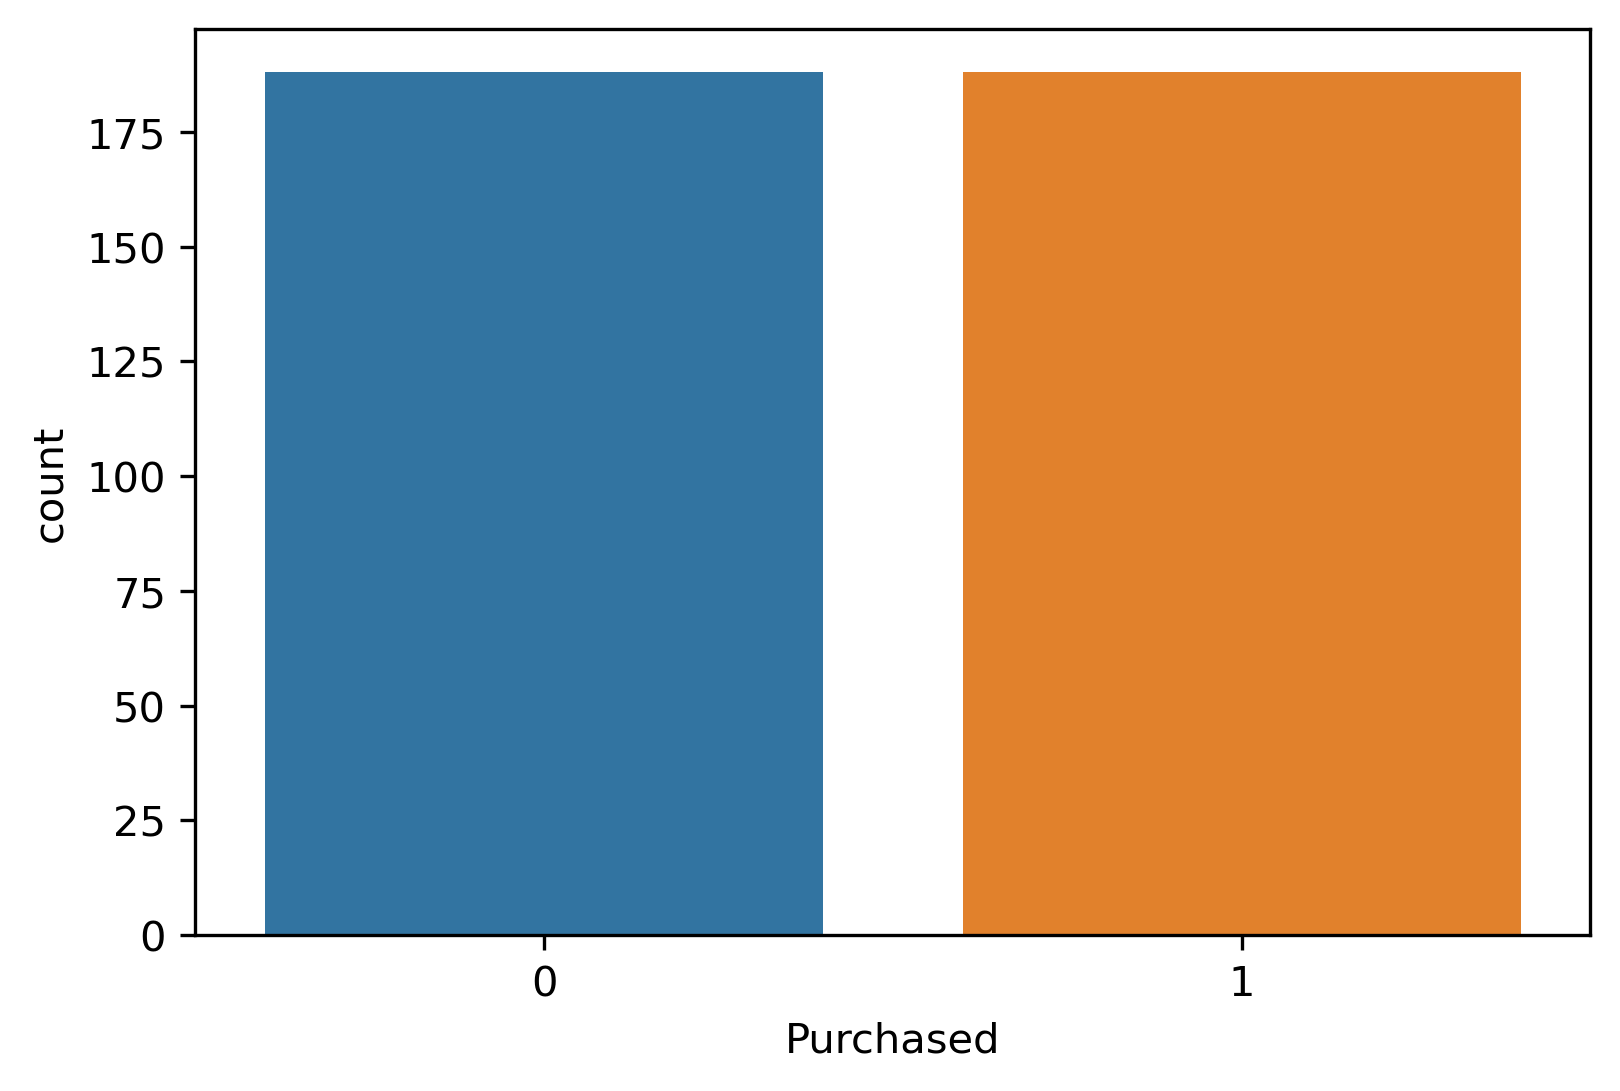

In [ ]:
sns.countplot(x="Purchased", data=y_train_over)

plt.show()

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 57 to 265
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Purchased  300 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [ ]:
X_train_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          224 non-null    int64
 1   Age              224 non-null    int64
 2   EstimatedSalary  224 non-null    int64
 3   Male             224 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.6 KB


In [ ]:
from scipy.spatial import distance
import pandas as pd

In [ ]:
df = pd.read_csv("datasets/Starbucks_Seoul.csv")
df.tail()

,name,address,gu_name,latitude,longitude
516,황학사거리,"서울특별시 성동구 왕십리로 410 (하왕십리동, 센트라스)",성동구,37.567644,127.023697
517,황학캐슬,서울특별시 중구 청계천로 400 (황학동) 롯데캐슬베네치아,중구,37.571240,127.022905
518,회기역사거리,서울특별시 동대문구 이문로 37 (회기동),동대문구,37.590784,127.056098
519,회현역,서울특별시 중구 퇴계로 72 (회현동) 리더스뷰남산,중구,37.558981,126.980747
520,효창공원앞역,"서울특별시 용산구 백범로 313 (효창동, 용산 롯데캐슬 센터포레)",용산구,37.539305,126.963060


In [ ]:
df1 = df[(df['gu_name']=='금천구')]
df1

,name,address,gu_name,latitude,longitude
2,W-Mall,서울특별시 금천구 디지털로 188 (가산동),금천구,37.477305,126.887691
7,가산그레이트,"서울특별시 금천구 디지털로9길 32, 갑을그레이트밸리 1층 (가산동)",금천구,37.479449,126.887477
8,가산디지털,서울특별시 금천구 가산디지털1로 168 (가산동),금천구,37.479835,126.882500
9,가산디지털단지역,서울특별시 금천구 벚꽃로 298 (가산동),금천구,37.481324,126.883779
10,가산브이타워,서울특별시 금천구 가산디지털1로 128 (가산동),금천구,37.477221,126.883683
11,가산에스케이,서울특별시 금천구 가산디지털1로 171 (가산동),금천구,37.480613,126.880570
79,금천독산,서울특별시 금천구 두산로 70 (독산동),금천구,37.469140,126.895246
80,금천시흥,서울특별시 금천구 시흥대로 164 (시흥동),금천구,37.448624,126.903183
123,독산사거리,서울특별시 금천구 시흥대로 426 (독산동),금천구,37.471511,126.898775
146,마리오아울렛,서울특별시 금천구 벚꽃로 266 마리오아울렛3관,금천구,37.478701,126.885076


In [ ]:
dist_euclidean = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']], metric='euclidean')

dist_euclidean = pd.DataFrame(data=dist_euclidean, columns=df1['name'])
dist_euclidean.set_index(df1['name'],inplace=True)

dist_euclidean

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002155,0.005775,0.005608,0.004009,0.007852,0.011124,0.032598,0.012507,0.002964
가산그레이트,0.002155,0.000000,0.004992,0.004146,0.004400,0.007004,0.012909,0.034596,0.013808,0.002515
가산디지털,0.005775,0.004992,0.000000,0.001963,0.002869,0.002081,0.016639,0.037442,0.018280,0.002815
가산디지털단지역,0.005608,0.004146,0.001963,0.000000,0.004104,0.003287,0.016731,0.038024,0.017921,0.002926
가산브이타워,0.004009,0.004400,0.002869,0.004104,0.000000,0.004604,0.014107,0.034613,0.016136,0.002032
가산에스케이,0.007852,0.007004,0.002081,0.003287,0.004604,0.000000,0.018628,0.039175,0.020353,0.004895
금천독산,0.011124,0.012909,0.016639,0.016731,0.014107,0.018628,0.000000,0.021998,0.004252,0.013959
금천시흥,0.032598,0.034596,0.037442,0.038024,0.034613,0.039175,0.021998,0.000000,0.023308,0.035107
독산사거리,0.012507,0.013808,0.018280,0.017921,0.016136,0.020353,0.004252,0.023308,0.000000,0.015471


In [ ]:
dist_manhattan = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']], metric='cityblock')

dist_manhattan = pd.DataFrame(data=dist_manhattan, columns=df1['name'])
dist_manhattan.set_index(df1['name'],inplace=True)

dist_manhattan

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002358,0.007721,0.007931,0.004092,0.010429,0.015720,0.044173,0.016878,0.004011
가산그레이트,0.002358,0.000000,0.005363,0.005573,0.006022,0.008071,0.018078,0.046531,0.019236,0.003149
가산디지털,0.007721,0.005363,0.000000,0.002769,0.003797,0.002708,0.023441,0.051894,0.024599,0.003710
가산디지털단지역,0.007931,0.005573,0.002769,0.000000,0.004199,0.003920,0.023651,0.052104,0.024809,0.003920
가산브이타워,0.004092,0.006022,0.003797,0.004199,0.000000,0.006505,0.019644,0.048097,0.020802,0.002873
가산에스케이,0.010429,0.008071,0.002708,0.003920,0.006505,0.000000,0.026149,0.054602,0.027307,0.006418
금천독산,0.015720,0.018078,0.023441,0.023651,0.019644,0.026149,0.000000,0.028453,0.005900,0.019731
금천시흥,0.044173,0.046531,0.051894,0.052104,0.048097,0.054602,0.028453,0.000000,0.027295,0.048184
독산사거리,0.016878,0.019236,0.024599,0.024809,0.020802,0.027307,0.005900,0.027295,0.000000,0.020889


In [ ]:
dist_minkowski = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']],  metric='minkowski', p=1.5)

dist_minkowski = pd.DataFrame(data=dist_minkowski, columns=df1['name'])
dist_minkowski.set_index(df1['name'],inplace=True)

dist_minkowski

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002189,0.006310,0.006295,0.004016,0.008554,0.012482,0.035842,0.013725,0.003257
가산그레이트,0.002189,0.000000,0.005048,0.004541,0.004860,0.007222,0.014420,0.037907,0.015384,0.002672
가산디지털,0.006310,0.005048,0.000000,0.002201,0.003121,0.002247,0.018641,0.041612,0.020034,0.003056
가산디지털단지역,0.006295,0.004541,0.002201,0.000000,0.004113,0.003428,0.018776,0.042028,0.019906,0.003200
가산브이타워,0.004016,0.004860,0.003121,0.004113,0.000000,0.005165,0.015714,0.038516,0.017351,0.002281
가산에스케이,0.008554,0.007222,0.002247,0.003428,0.005165,0.000000,0.020832,0.043657,0.022276,0.005302
금천독산,0.012482,0.014420,0.018641,0.018776,0.015714,0.020832,0.000000,0.023688,0.004728,0.015664
금천시흥,0.035842,0.037907,0.041612,0.042028,0.038516,0.043657,0.023688,0.000000,0.024159,0.038834
독산사거리,0.013725,0.015384,0.020034,0.019906,0.017351,0.022276,0.004728,0.024159,0.000000,0.016982


In [ ]:
dist_chebyshev = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']],  metric='chebyshev')

dist_chebyshev = pd.DataFrame(data=dist_chebyshev, columns=df1['name'])
dist_chebyshev.set_index(df1['name'],inplace=True)

dist_chebyshev

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002144,0.005191,0.004019,0.004008,0.007121,0.008165,0.028681,0.011084,0.002615
가산그레이트,0.002144,0.000000,0.004977,0.003698,0.003794,0.006907,0.010309,0.030825,0.011298,0.002401
가산디지털,0.005191,0.004977,0.000000,0.001489,0.002614,0.001929,0.012746,0.031211,0.016275,0.002576
가산디지털단지역,0.004019,0.003698,0.001489,0.000000,0.004103,0.003209,0.012184,0.032700,0.014996,0.002623
가산브이타워,0.004008,0.003794,0.002614,0.004103,0.000000,0.003392,0.011563,0.028597,0.015092,0.001480
가산에스케이,0.007121,0.006907,0.001929,0.003209,0.003392,0.000000,0.014676,0.031989,0.018205,0.004506
금천독산,0.008165,0.010309,0.012746,0.012184,0.011563,0.014676,0.000000,0.020516,0.003529,0.010170
금천시흥,0.028681,0.030825,0.031211,0.032700,0.028597,0.031989,0.020516,0.000000,0.022887,0.030077
독산사거리,0.011084,0.011298,0.016275,0.014996,0.015092,0.018205,0.003529,0.022887,0.000000,0.013699


In [ ]:
dist_mahalanobis = distance.cdist(df1[['latitude','longitude']],
                                  df1[['latitude','longitude']],  metric='mahalanobis')

dist_mahalanobis = pd.DataFrame(data=dist_mahalanobis, columns=df1['name'])
dist_mahalanobis.set_index(df1['name'],inplace=True)

dist_mahalanobis

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.412222,1.008327,0.534635,1.137676,1.408515,1.021456,3.181956,2.092650,0.489261
가산그레이트,0.412222,0.000000,1.320538,0.706980,1.502236,1.716643,1.095370,3.520033,1.851829,0.817487
가산디지털,1.008327,1.320538,0.000000,0.658912,0.317804,0.400714,1.900196,3.251106,3.100708,0.519729
가산디지털단지역,0.534635,0.706980,0.658912,0.000000,0.911016,1.035496,1.554849,3.489268,2.550268,0.304243
가산브이타워,1.137676,1.502236,0.317804,0.911016,0.000000,0.420369,1.900563,2.976769,3.197236,0.687926
가산에스케이,1.408515,1.716643,0.400714,1.035496,0.420369,0.000000,2.271659,3.340112,3.500299,0.920369
금천독산,1.021456,1.095370,1.900196,1.554849,1.900563,2.271659,0.000000,2.709650,1.458239,1.434991
금천시흥,3.181956,3.520033,3.251106,3.489268,2.976769,3.340112,2.709650,0.000000,3.913709,3.194173
독산사거리,2.092650,1.851829,3.100708,2.550268,3.197236,3.500299,1.458239,3.913709,0.000000,2.581894


In [ ]:
dist_cosine = distance.cdist(df1[['latitude','longitude']],
                             df1[['latitude','longitude']],  metric='cosine')

dist_cosine = pd.DataFrame(data=dist_cosine, columns=df1['name'])
dist_cosine.set_index(df1['name'],inplace=True)

dist_cosine

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000e+00,1.279999e-10,4.336818e-10,7.034265e-10,3.177569e-11,7.693565e-10,2.839378e-09,2.905348e-08,2.159871e-09,1.235210e-10
가산그레이트,1.279999e-10,0.000000e+00,9.046519e-11,2.312980e-10,3.222511e-11,2.697336e-10,4.173098e-09,3.303834e-08,3.339466e-09,3.974598e-14
가산디지털,4.336818e-10,9.046519e-11,0.000000e+00,3.245748e-11,2.306766e-10,4.777900e-11,5.492417e-09,3.658644e-08,4.529214e-09,9.430401e-11
가산디지털단지역,7.034265e-10,2.312980e-10,3.245748e-11,0.000000e+00,4.361916e-10,1.476264e-12,6.369318e-09,3.879836e-08,5.328503e-09,2.374124e-10
가산브이타워,3.177569e-11,3.222511e-11,2.306766e-10,4.361916e-10,0.000000e+00,4.884229e-10,3.471896e-09,3.100691e-08,2.715597e-09,2.999756e-11
가산에스케이,7.693565e-10,2.697336e-10,4.777900e-11,1.476264e-12,4.884229e-10,0.000000e+00,6.564742e-09,3.927851e-08,5.507374e-09,2.763334e-10
금천독산,2.839378e-09,4.173098e-09,5.492417e-09,6.369318e-09,3.471896e-09,6.564742e-09,0.000000e+00,1.372763e-08,4.639511e-11,4.147336e-09
금천시흥,2.905348e-08,3.303834e-08,3.658644e-08,3.879836e-08,3.100691e-08,3.927851e-08,1.372763e-08,0.000000e+00,1.537015e-08,3.296578e-08
독산사거리,2.159871e-09,3.339466e-09,4.529214e-09,5.328503e-09,2.715597e-09,5.507374e-09,4.639511e-11,1.537015e-08,0.000000e+00,3.316424e-09
